In [3]:
CLEAN_DATA_PATH = './data/Cleaned_Data/cleanData.pkl'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

In [5]:
data = pd.read_pickle(CLEAN_DATA_PATH)
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Average Salary,State,Company_Age_years,python,R,spark,AWS,excel,Job_Specification,Competitors_Number
0,Data Scientist,53000-91000,"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72000.0,NM,48,1,0,0,0,1,Data Scientist,0
1,Healthcare Data Scientist,63000-112000,What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87500.0,MD,37,1,0,0,0,0,Data Scientist,0
2,Data Scientist,80000-90000,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85000.0,FL,11,1,0,1,0,1,Data Scientist,0
3,Data Scientist,56000-97000,*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76500.0,WA,56,1,0,0,0,0,Data Scientist,3
4,Data Scientist,86000-143000,Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114500.0,NY,23,1,0,0,0,1,Data Scientist,3


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 0 to 955
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Job Title                 742 non-null    object 
 1   Salary Estimate           742 non-null    object 
 2   Job Description           742 non-null    object 
 3   Rating                    742 non-null    float64
 4   Company Name              742 non-null    object 
 5   Location                  742 non-null    object 
 6   Headquarters              742 non-null    object 
 7   Size                      742 non-null    object 
 8   Founded                   742 non-null    int64  
 9   Type of ownership         742 non-null    object 
 10  Industry                  742 non-null    object 
 11  Sector                    742 non-null    object 
 12  Revenue                   742 non-null    object 
 13  Competitors               742 non-null    object 
 14  SalaryPerH

# Data Exploration

### what's features that affect job salary?


#### Univariate Exploration

1- Rating

It is look like the rating data is approximated normally distributed expect there is small
 outliers that do not have rating (-1 rating) and most of companies rated 3.9


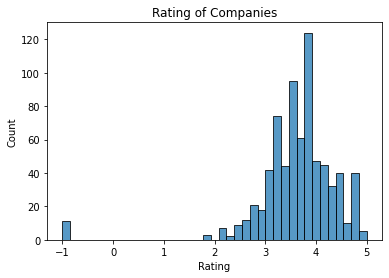

In [7]:
plt.title('Rating of Companies')
sn.histplot(data=data, x='Rating');
print('It is look like the rating data is approximated normally distributed expect there is small\n',
'outliers that do not have rating (-1 rating) and most of companies rated 3.9')

2- Salary

It is look like the rating data is approximated skewed ro the right because there is some outliers that paied alot of many annually


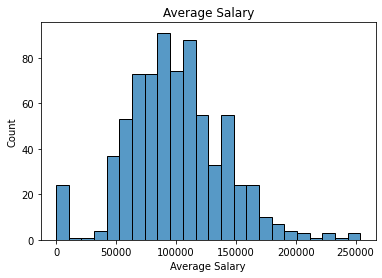

In [8]:
plt.title('Average Salary')
sn.histplot(data=data, x='Average Salary');
print('It is look like the rating data is approximated skewed ro the right because there is some',
'outliers that paied alot of many annually')

3- Company Age

It is look like the rating data is approximated skewed ro the right because there is some
 outliers that most of companies Establishing before 1900 so may be old companies affect salary


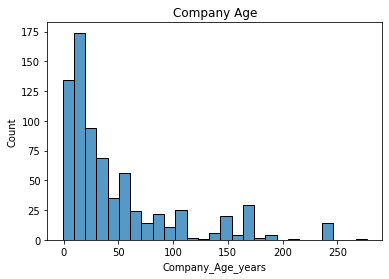

In [9]:
plt.title('Company Age')
sn.histplot(data=data, x='Company_Age_years');
print('It is look like the rating data is approximated skewed ro the right because there is some\n',
'outliers that most of companies Establishing before 1900 so may be old companies affect salary')

### Bivariate Exploration

#### find does companies age affect salary?
#### dose job title affect salary?

From what i see that age do not affect match in job salary


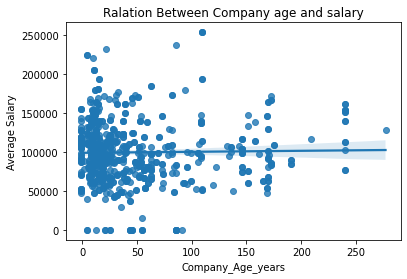

In [10]:
plt.title('Ralation Between Company age and salary')
sn.regplot(data=data, x='Company_Age_years', y ='Average Salary');
print('From what i see that age do not affect match in job salary')

it is seem like the position affect alittle in salary i see that Data scientist and director take more salary


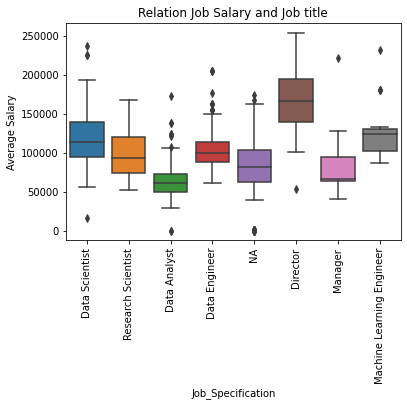

In [11]:
plt.title('Relation Job Salary and Job title')
sn.boxplot(data=data, x='Job_Specification', y='Average Salary');
plt.xticks(rotation = 90);
print('it is seem like the position affect alittle in salary i see that Data scientist and director take more salary')

### Multivariate Exploration


In [12]:
pd.pivot_table(data=data, index = ['State','Job_Specification'], values = 'Average Salary').sort_values('State', ascending = False)

Average Salary
State Job_Specification                
WI    NA                   54000.000000
      Data Scientist      113500.000000
      Data Analyst         58833.333333
WA    NA                   97500.000000
      Data Scientist       99764.705882
...                                 ...
AZ    Data Analyst         55000.000000
      NA                  124500.000000
AL    NA                   43750.000000
      Data Engineer        65000.000000
      Data Analyst         62200.000000

[121 rows x 1 columns]

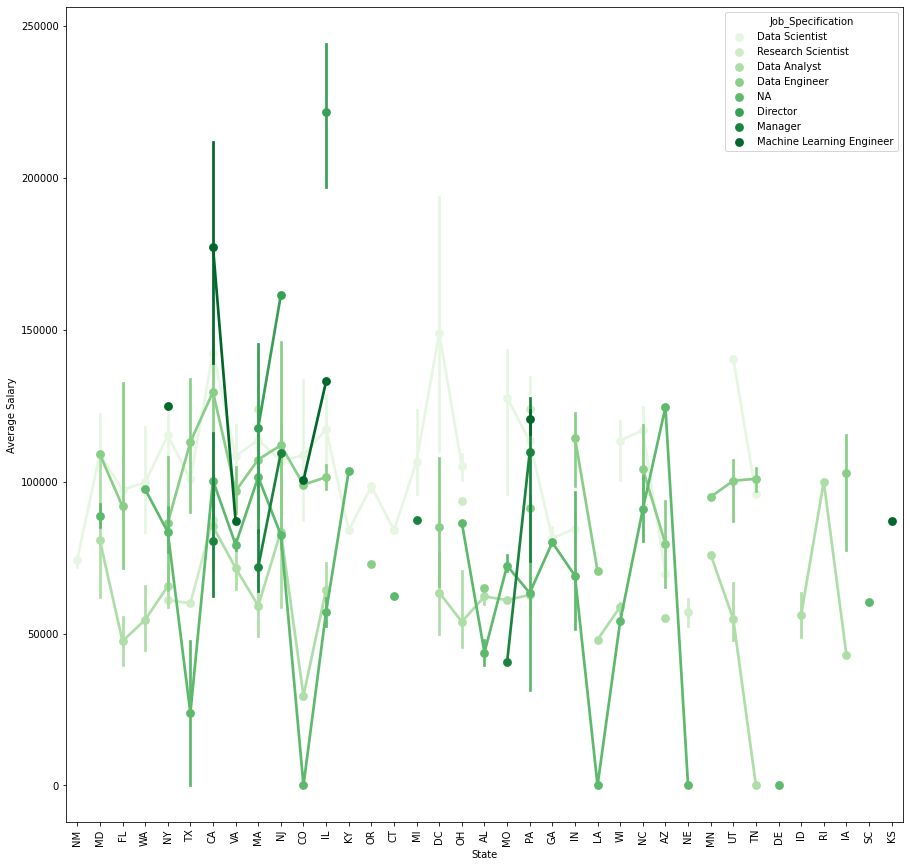

In [13]:
plt.figure(figsize=[15, 15])
sn.pointplot(data=data, x='State', y='Average Salary', hue='Job_Specification', palette='Greens');
plt.xticks(rotation = 90);
